<a href="https://colab.research.google.com/github/FreakyTalons/bostonHousing-ML/blob/main/Boston_Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving housing.csv to housing.csv


In [2]:
import pandas as pd
housing = pd.read_csv("housing.csv")

In [3]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [4]:
housing.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [5]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [6]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
for trainIndex, testIndex in split.split(housing,housing['CHAS']):
  stratifiedTrainSet = housing.loc[trainIndex]
  stratifiedTestSet = housing.loc[testIndex]

In [7]:
trainLabels = stratifiedTrainSet.pop('MEDV')
testLabels = stratifiedTestSet.pop('MEDV')

In [8]:
stratifiedTrainSet.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000
mean,3.630612,11.026836,11.361582,0.067797,0.559219,6.268881,68.565819,3.691179,9.593220,412.209040,18.401977,355.270565,12.734633
std,8.366787,22.270612,6.904776,0.251752,0.118326,0.726089,28.673784,2.041348,8.712178,167.985772,2.157488,93.628356,7.177097
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,188.000000,13.000000,0.320000,1.920000
25%,0.085013,0.000000,5.190000,0.000000,0.450000,5.875750,43.650000,2.042000,4.000000,281.750000,17.075000,374.710000,6.802500
50%,0.268880,0.000000,9.900000,0.000000,0.538000,6.215000,77.950000,3.040100,5.000000,346.500000,18.900000,391.065000,11.650000
75%,3.689387,12.500000,18.100000,0.000000,0.631000,6.628000,94.100000,4.941025,24.000000,666.000000,20.200000,395.675000,16.930000
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,36.980000


In [10]:
def norm(x):
  trainCopy = stratifiedTestSet.describe()
  trainCopy = trainCopy.transpose()
  return (x - trainCopy['mean']) / trainCopy['std']
normalizedTrainData = norm(stratifiedTrainSet)
normalizedTestData = norm(stratifiedTestSet)

In [11]:
normalizedTrainData.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000
mean,0.006215,-0.043683,0.110880,-0.017587,0.137400,-0.081247,-0.001121,-0.154578,0.016719,0.077773,-0.081623,-0.054438,0.038373
std,0.914053,0.867695,1.023045,0.968452,1.079439,1.124932,1.062812,0.912630,0.998678,0.988092,0.987743,1.090931,1.014241
min,-0.389731,-0.473305,-1.462865,-0.278390,-1.415438,-4.276574,-2.435065,-1.299788,-0.968323,-1.241024,-2.554760,-4.190222,-1.489911
25%,-0.381134,-0.473305,-0.803531,-0.278390,-0.858961,-0.690326,-0.924641,-0.891880,-0.624432,-0.689587,-0.689141,0.172065,-0.799934
50%,-0.361047,-0.473305,-0.105675,-0.278390,-0.056176,-0.164725,0.346710,-0.445657,-0.509802,-0.308727,0.146382,0.362629,-0.114903
75%,0.012636,0.013713,1.109277,-0.278390,0.792222,0.475136,0.945320,0.404193,1.668169,1.570571,0.741549,0.416344,0.631247
max,7.643018,3.422839,2.537587,3.568452,2.981637,3.809235,1.164007,2.983475,1.668169,1.835260,1.199370,0.430617,3.464639


In [15]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

def build_model():
  model = keras.Sequential([
      layers.Dense(64, activation='relu', input_shape = [len(normalizedTrainData.keys())]),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
              optimizer=optimizer,
              metrics=['mae','mse'])

  return model

In [16]:
model = build_model()

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                896       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 9,281
Trainable params: 9,281
Non-trainable params: 0
_________________________________________________________________


In [33]:
EPOCHS = 3000

history = model.fit(
    normalizedTrainData, trainLabels,
    epochs=EPOCHS, validation_split = 0.2, verbose=0
)

In [34]:
hist = pd.DataFrame(history.history)
hist['epoch']=history.epoch
hist

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
0,2.587335,1.207951,2.587335,12.273601,2.469513,12.273601,0
1,2.207458,1.094501,2.207458,12.945996,2.702778,12.945996,1
2,2.395950,1.122164,2.395950,11.752252,2.448357,11.752252,2
3,2.952576,1.272012,2.952576,14.179047,2.610027,14.179047,3
4,2.339691,1.158692,2.339691,12.478363,2.531471,12.478363,4
...,...,...,...,...,...,...,...
2995,0.199677,0.346729,0.199677,18.258356,2.779729,18.258356,2995
2996,0.260341,0.365466,0.260341,18.754810,2.925507,18.754810,2996
2997,0.176955,0.342848,0.176955,17.807383,2.808508,17.807383,2997
2998,0.238229,0.403146,0.238229,18.429983,2.873377,18.429985,2998


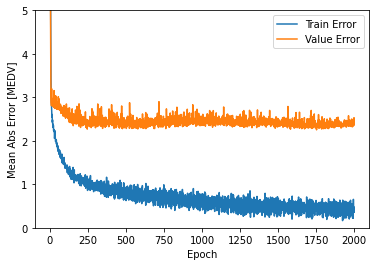

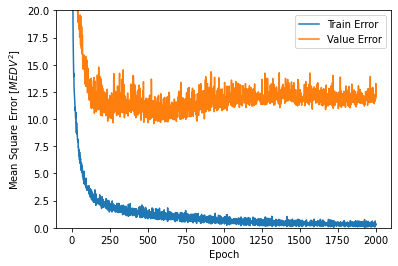

In [20]:
import matplotlib.pyplot as plt

def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MEDV]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label='Value Error')
  plt.ylim([0,5])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MEDV^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label='Value Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()

plot_history(history)

In [35]:
loss, mae, mse = model.evaluate(normalizedTestData, testLabels, verbose=2)
print("Testing set Mean Abs Error: {:5.2f} MEDV".format(mae))

5/5 - 0s - loss: 21.2970 - mae: 2.7925 - mse: 21.2970
Testing set Mean Abs Error:  2.79 MEDV


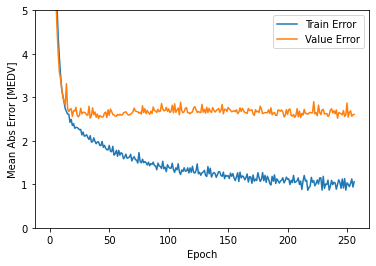

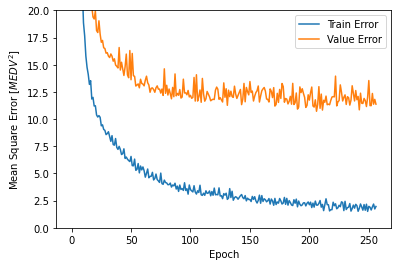

In [36]:
model = build_model()
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)

history = model.fit(normalizedTrainData, trainLabels, epochs=EPOCHS,
                    validation_split=0.2, verbose=0, callbacks=[early_stop])
plot_history(history)

In [37]:
loss, mae, mse = model.evaluate(normalizedTestData, testLabels, verbose=2)
print("Testing set Mean Abs Error: {:5.2f} MEDV".format(mae))

5/5 - 0s - loss: 12.7054 - mae: 2.4826 - mse: 12.7054
Testing set Mean Abs Error:  2.48 MEDV


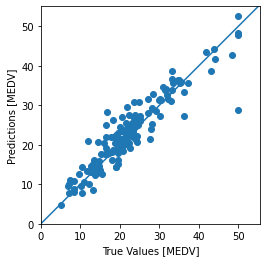

In [38]:
testPredictions = model.predict(normalizedTestData).flatten()
trainPredictions = model.predict(normalizedTrainData).flatten()

plt.scatter(testLabels, testPredictions)
plt.xlabel("True Values [MEDV]")
plt.ylabel("Predictions [MEDV]")
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

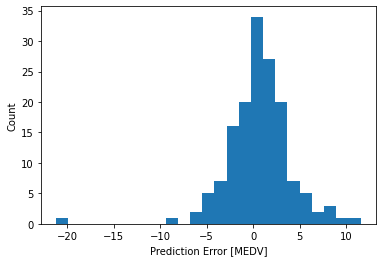

In [39]:
error = testPredictions - testLabels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MEDV]")
_ = plt.ylabel("Count")